Q. Let $f(x)=x^2+4cos(x)$. We wish to find the minimizer $x^*$ of $f$ over the interval $[1,2]$.

(a) Plot $f(x)$ versus $x$ over the interval $[1,2]$.

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
# function definition
def f(x):

  y = x**2 + 4*np.cos(x)

  return y

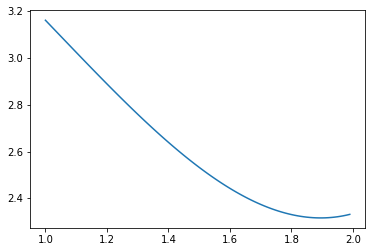

In [11]:
# Ploting the function x^2+4cos(x)
x = np.arange(1,2,0.01)
y = [0]* len(x) # define an empty array for storing values of y

for i in range(0,len(x)):
  y[i] = f(x[i])

plt.plot(x, y)

(b) Use the golden section method to locate $x^*$ to within an uncertainty of $0.2$. Display all intermediate steps using a table

In [54]:
# Golden section search function 
def golden_section_search(a,b,ro,r):
  
    ''' The number of iterations needed to reach the given range between two values,i.e|a-b|< epsilon
         (1-ro)^N <= 0.2(final range)/1(given initial range)'''

    N=math.ceil(np.log10(r/(b-a))/np.log10(1-ro))

    arr1 = np.array(["Iteration k","a","b","f(a)","f(b)", "New Uncertainity interval"])
   
    arr = np.empty((N, 6), dtype=object)

    arr = np.vstack((arr1,arr))

    a1 = a + ro*(b-a)

    b1 = a + (1-ro)*(b-a)

    for i in range(1,len(arr)):

      j=0

      f1= f(a1); f2 = f(b1)

      if f1<=f2:

        b=b1

        b1=a1

        a1 = a + ro*(b-a) 

      else:
       
        a = a1

        a1 = b1

        b1 =  a + (1-ro)*(b-a)

      arr[i,j] = i ; arr[i,j+1]=a1 ; arr[i,j+2]=b1; arr[i,j+3]=f1; arr[i,j+4]=f2;arr[i,j+5]= str([a,b])
     
      if abs(a-b) <= r:

        for i in arr:

          print(*i)

In [55]:
a = 1
b = 2
ro = 0.3819
r = 0.2
golden_section_search(a,b,ro,r)

Iteration k a b f(a) f(b) New Uncertainity interval
1 1.6181 1.76394761 2.6607474836438056 2.42910347493365 [1.3819, 2]
2 1.76394761 1.85415239 2.42910347493365 2.3437010685479547 [1.6181, 2]
3 1.85415239 1.909851592259 2.3437010685479547 2.3195632893965064 [1.76394761, 2]
4 1.909851592259 1.944300797741 2.3195632893965064 2.3171479422166215 [1.85415239, 2]


(c) Repeat part b using the Fibonacci method, with $\epsilon = 0.05$. Display all intermediate steps using a table.

In [48]:
#Fibonacci Function
def fibonacci(n):

  f0=0

  f1=1

  #Initialize an empty array

  arr = [0]*n

  arr[0]= 0

  arr[1]= 1

  for i in range(2,n):

    arr[i]=arr[i-1]+arr[i-2]
    
  return arr[1:]

In [106]:
# Fibonacci search Method 
def fibonacci_search(a,b,r,eps):
  
    ''' The number of iterations needed to reach the given range between two values,i.e|a-b|< epsilon
         (1+2*epsilon)^/F_(n+1) <= 0.2(final range)/1(given initial range)'''

    N = math.ceil((1+2*eps)/(r/(b-a)))
    
    fib = fibonacci(N+1)
    #Comparing the value of N, in our fibonacci sequence

    for i in range(0,len(fib)):

      if fib[i] >= N:

        N=i-1  #because F_(N+1)>= N, so value of iteration N, will be less than N+1.
        break

    print(N,"-iterations are needed to reach within the given range","\n")
  
    arr = np.empty((N, 7), dtype=object)

    ro = 1 - (fib[N]/fib[N+1])

    a1 = a + ro*(b-a)

    b1 = a + (1-ro)*(b-a)

    for i in range(0,N):

      j = 0

      f1 = f(a1); f2 = f(b1)

      ro = 1 - (fib[N-i]/fib[N+1-i]) # recalculating the value of rho, for every interval

      if ro == 0.5: #special case for the last iteration being handled in this if clause.
       
        if f1 <= f2:
          
          b = b1

          b1 = a1  
          
          a1 = a + (ro-eps)*(b-a) 

        else:

          a = a1

          a1 = b1
        
          b1 =  a + (ro+eps)*(b-a)

      else:  # for rest of the iterations before the last iteration, the following steps are executed.

        if f1 <= f2:

          b=b1

          b1=a1

          a1 = a + ro*(b-a) 

        else:

          a = a1

          a1 = b1

          b1 =  a + (1-ro)*(b-a)
     
      arr[i,j] = i ; arr[i,j+1] = ro; arr[i,j+2] = a1 ; arr[i,j+3] = b1

      arr[i,j+4] = f1; arr[i,j+5] = f2; arr[i,j+6]= str([a,b])

      if abs(a-b) <= r:

        arr1 = np.array(["Iter-k"," rho "," a "," b "," f(a) "," f(b) ", " New Uncertainity interval "])
   
        arr = np.vstack((arr1,arr))

        for i in arr:

          print(*i)

      

In [107]:
a=1
b=2
r=0.2
fibonacci_search(a,b,r,eps=0.05)

4 -iterations are needed to reach within the given range 

Iter-k  rho   a   b   f(a)   f(b)   New Uncertainity interval 
0 0.375 1.625 1.765625 2.668815831955949 2.4239164598922547 [1.375, 2]
1 0.4 1.765625 1.85 2.4239164598922547 2.34303783115869 [1.625, 2]
2 0.33333333333333337 1.85 1.921875 2.34303783115869 2.3201390127019486 [1.765625, 2]
3 0.5 1.921875 1.9325 2.3201390127019486 2.317959979837098 [1.85, 2]


(d) Apply Newton's method, using the same number of iterations as in part (b), with $x^{(0)} = 1$

In [89]:
'''Link :https://medium.com/@jamesetaylor/create-a-derivative-calculator-in-python-72ee7bc734a4'''
''' Using the concept of finite difference :https://www.wikiwand.com/en/Finite_difference'''

#Create a derivative and second derivative calculator in Python

from math import *
import numpy  as np

# Function definition 
def f(x):
  
  return x**2 + 4*np.cos(x)


#function to calculate 1st derivative
def der1(f,value):
  h = 0.00001      # substitute for h-> infinity
  top = f(value+h) - f(value)
  bottom = h
  slope = top/bottom

  #Returns slode to second decimal 
  return float("%.2f"% slope)

#function to calculate 2nd derivative
def der2(f,value):
  h = 0.00001
  top = f(value + 2*h) - 2*f(value + h) + f(value)
  bottom = h**2
  slope = top/bottom

  #Returns slode to second decimal 
  return float("%.2f"% slope)

In [98]:
# Implementation of Newton method

def Newton(x,eps):
  
  x0 = x

  N = 4 # same iterations as part (b)

  x1 = np.float("{:10.10f}".format(x0 - (der1(f,x0)/der2(f,x0))))

  i=1

  arr = np.empty((N,5), dtype=object)

  for i in range(0,4): # since the question asks to implement Newton's method using same num of iteration as part(b)

    j = 0

    arr[i,j] = i ;arr[i,j+1] = x0 ; arr[i,j+2] = x1 ; arr[i,j+3] = der1(f,x0); arr[i,j+4]= der2(f,x0)

    x0=x1

    x1 = np.float("{:10.10f}".format(x0 - (der1(f,x0)/der2(f,x0))))


  arr1 = np.array(["Iter-k","x0","x1"," 1st derivative ","2nd Derivative"])
   
  arr = np.vstack((arr1,arr))

  for i in arr:

    print(*i)    


In [112]:
x = 1
eps = 0.00001
Newton(x,eps=0.00001)
print("\n")
print("Since we see in the 3rd iteration the 2nd derivative is  negative, Newton method is not effective for this function ")
print("\n")

Iter-k x0 x1  1st derivative  2nd Derivative
0 1 -7.5625 -1.37 -0.16
1 -7.5625 5.7198529412 -11.29 0.85
2 5.7198529412 15.5604326513 13.58 -1.38
3 15.5604326513 10.4379494298 30.53 5.96


Since we see in the 3rd iteration the 2nd derivative is  negative, Newton method is not effective for this function 




Q. Let $f(x) = 8e^{1-x} + 7 log(x)$, where "log" representes the natural logarithm function.
(a) To plot $f(x)$ versus $x$ over the interval $[1,2]$, and verify that $f$ is unimodal over $[1,2]$

In [124]:
def fun(x):

  y = 8*math.exp(1-x) + 7*math.log(x)

  return y

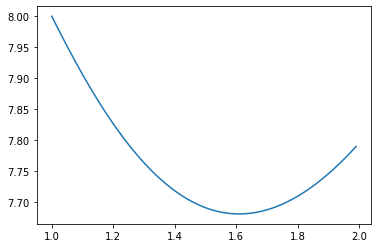

In [125]:
# Ploting the function x^2+4cos(x)
x = np.arange(1,2,0.01)
y = [0]* len(x) # define an empty array for storing values of y

for i in range(0,len(x)):
  y[i] = fun(x[i])

plt.plot(x, y)

(b) Write a program to implement golden section method that locates the minimizer over $[1,2]$ to within an uncertainity of 0.23

In [127]:
# Golden section search function 
def golden_section_search(a,b,ro,r):
  
    ''' The number of iterations needed to reach the given range between two values,i.e|a-b|< epsilon
         (1-ro)^N <= 0.2(final range)/1(given initial range)'''

    N=math.ceil(np.log10(r/(b-a))/np.log10(1-ro))

    print(N,": Iterations are needed to arrive at the given range")

    arr1 = np.array(["Iteration k","a","b","f(a)","f(b)", "New Uncertainity interval"])
   
    arr = np.empty((N, 6), dtype=object)

    arr = np.vstack((arr1,arr))

    a1 = a + ro*(b-a)

    b1 = a + (1-ro)*(b-a)

    for i in range(1,len(arr)):

      j=0

      f1= fun(a1); f2 = fun(b1)

      if f1<=f2:

        b=b1

        b1=a1

        a1 = a + ro*(b-a) 

      else:
       
        a = a1

        a1 = b1

        b1 =  a + (1-ro)*(b-a)

      arr[i,j] = i ; arr[i,j+1]=a1 ; arr[i,j+2]=b1; arr[i,j+3]=f1; arr[i,j+4]=f2;arr[i,j+5]= str([a,b])
     
      if abs(a-b) <= r:

        for i in arr:

          print(*i)

In [128]:
a = 1
b = 2
ro = 0.3819
r = 0.23
golden_section_search(a,b,ro,r)

4 : Iterations are needed to arrive at the given range
Iteration k a b f(a) f(b) New Uncertainity interval
1 1.6181 1.76394761 7.724721995777511 7.680508379013911 [1.3819, 2]
2 1.527803982259 1.6181 7.680508379013911 7.699471015377631 [1.3819, 1.76394761]
3 1.6181 1.673764358565712 7.686011606138488 7.680508379013911 [1.527803982259, 1.76394761]
4 1.5835462499705333 1.6181 7.680508379013911 7.683813930505595 [1.527803982259, 1.673764358565712]


(c) Repeat part b using the Fibonacci method, with $\epsilon=0.05$. Display all intermediate steps using a table

In [142]:
# Fibonacci search Method 
def fibonacci_search_2(a,b,r,eps):
  
    ''' The number of iterations needed to reach the given range between two values,i.e|a-b|< epsilon
         (1+2*epsilon)^/F_(n+1) <= 0.23(final range)/1(given initial range)'''

    N = math.ceil((1+2*eps)/(r/(b-a)))
    
    fib = fibonacci(N+1)
    #Comparing the value of N, in our fibonacci sequence

    for i in range(0,len(fib)):

      if fib[i] >= N:

        N=i-1  #because F_(N+1)>= N, so value of iteration N, will be less than N+1.
        break

    print(N,"-iterations are needed to reach within the given range","\n")
  
    arr = np.empty((N, 7), dtype=object)

    ro = 1 - (fib[N]/fib[N+1])

    a1 = a + ro*(b-a)

    b1 = a + (1-ro)*(b-a)

    for i in range(0,N):

      j = 0

      f1 = fun(a1); f2 = fun(b1)

      ro = 1 - (fib[N-i]/fib[N+1-i]) # recalculating the value of rho, for every interval

      if ro == 0.5: #special case for the last iteration being handled in this if clause.
       
        if f1 <= f2:

          b = b1

          b1 = a1  
          
          a1 = a + (ro-eps)*(b-a) 

        else:

          a = a1

          a1 = b1
        
          b1 =  a + (ro+eps)*(b-a)

      else:  # for rest of the iterations before the last iteration, the following steps are executed.

        if f1 <= f2:

          b=b1

          b1=a1

          a1 = a + ro*(b-a) 

        else:

          a = a1

          a1 = b1

          b1 =  a + (1-ro)*(b-a)
     
      arr[i,j] = i ; arr[i,j+1] = ro; arr[i,j+2] = a1 ; arr[i,j+3] = b1

      arr[i,j+4] = f1; arr[i,j+5] = f2; arr[i,j+6]= str([a,b])

    

      if abs(a-b) <= r:

        arr1 = np.array(["Iter-k"," rho "," a "," b "," f(a) "," f(b) ", " New Uncertainity interval "])
   
        arr = np.vstack((arr1,arr))

        for i in arr:

          print(*i)

      

In [143]:
a=1
b=2
r=0.24
fibonacci_search_2(a,b,r,eps=0.05)

3 -iterations are needed to reach within the given range 

Iter-k  rho   a   b   f(a)   f(b)   New Uncertainity interval 
0 0.4 1.6 1.76 7.717866024633604 7.680518493472361 [1.4, 2]
1 0.33333333333333337 1.52 1.6 7.680518493472361 7.698528079429697 [1.4, 1.76]
2 0.5 1.6 1.6520000000000001 7.68713672776885 7.680518493472361 [1.52, 1.76]


Q. Suppose that we have an effecient way of calculating exponentials. Based on this, use Newton's method to device a methodd to approximate log(2) [where "log" is the natural logarithm function]. Use an initial point of $x^{(0)}=1$, and perform two iterations.

Q. Suppose that $\rho_1, \rho_2,\ldots, \rho_n$ are the values used in the Fibonacci serch method. Show that for each $k=1,\ldots, N$, $0\leq \rho_k \leq 1/2$, and for each $k = 1,\ldots, N$,

$\rho_{k+1}  = \frac{\rho_k}{1-\rho_k}$


Sol : We know $\rho_2 = 1 - \frac{F_{N-1}}{F_N}$
We dervive $\rho_2$ by taking $k=1$ in the given equation.

$F_{N+1} = F_N + F_{N-1}$. ------(1)

Given equation : 

=> $ \rho_{k+1} = 1 - \frac{\rho_k}{1- \rho_k}$

Substituting k =1,we get :

$ \rho_2 = 1 - \frac{\rho_1}{1- \rho_1}$

from the definition of Fibonacci method, we know  $\rho_1 = 1 - \frac{F_N}{F_{N+1}}$

=>$ \rho_2 = 1 - \frac{\rho_1}{1- \rho_1}$    


=>$\rho_2 = 1 - \frac{\frac{F_N}{F_{N+1}}}{1-\frac{F_N}{F_{N+1}}} $

=>$\rho_2 = 1 - \frac{\frac{F_N}{F_{N+1}}}{\frac{F_{N+1}-F_N}{F_{N+1}}} $

=>$\rho_2 = 1 - \frac{\frac{F_N}{F_{N+1}}}{\frac{F_{N-1}}{F_{N+1}}} $

$\rho_2 = 1 - \frac{F_N}{F_{N-1}} $

which is actually, equal to the value of $\rho_2$ as mentioned above.

Similarly, the equaltion is valid for $k=1,\ldots,N$


Q. Show that if $F_0,F_1,\ldots $ is  the Fibonacci seqence, then for $k=2,3,\ldots$, 

$F_{k-2}F_{k+1} - F_{k-1}F_k = (-1)^k $

Sol: We will proof by induction: 

1. Base Case: for k=2

lhs: $F_0F_3 - F_1F_2 =>  1*3 - 1*2=> 1 $

rhs : $ (-1)^2 = 1$

lhs = rhs. Equality of base case proven.

2. Inductive step : The given relation is true for $k$, ie. $F_{k-2}F_{k+1} - F_{k-1}F_k = (-1)^k$ is true.

Now, we prove the above relation is true for $k+1$

=> $F_{k+1-2}F_{k+1+1} - F_{k+1-1}F_{k+1}$

=> $F_{k-1}F_{k+2} - F_kF_{k+1}$

=> $F_{k-1}(F_k+F_{k+1}) - F_{k+1}(F_{k-1}+F_{k-2})$

=> $F_{k-1}F_k + F_{k-1}F_{k+1} - F_{k+1}F_{k-1} - F_{k+1}F_{k+2}$

=> $F_{k-1}F_k - F_{k+1}F_{k+2}$

=> $-(F_{k-1}F_k - F_{k+1}F_{k+2})$

=> $- (-1)^k$

=> $ (-1)^{k+1}$